In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

In [ ]:
# a=load_data()

In [ ]:
# len(a)

In [2]:
(trainX,trainY),(testX,testY)=load_data()

In [3]:
# trainX 
trainX.shape

(50000, 32, 32, 3)

In [4]:
trainY.shape

(50000, 1)

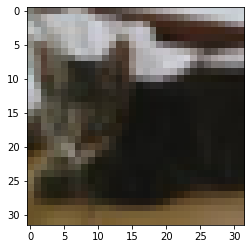

In [5]:
# plt.imshow(trainX[i])
plt.imshow(trainX[9])

In [ ]:
# plt.imshow(trainY[8])
# print(trainY[9])

In [ ]:
for i in range(49):
    plt.subplot(7,7,1+i)
    plt.axis('off')
    plt.imshow(trainX[i])
    

In [ ]:
# trainY.values_counts()

In [6]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
import numpy as np


In [7]:
def define_discriminator(in_shape=(32,32,3)):
    model=Sequential()
    
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    
    opt=Adam(lr=0.002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    
    return model

In [8]:
model = define_discriminator()
model.summary()
plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

C:\Users\mrhim\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# pip install graphviz

In [9]:
def load_real_sample():
    
    (trainX,_),(_,_)=load_data()
    X=trainX.astype('float32')
    X=(X-127.5)/127.5
    
    return X


In [ ]:
X= load_real_sample()

In [ ]:
X.shape

In [ ]:
# X[0]

In [13]:
def generate_real_sample(dataset,n_samples):
    
    ix= np.random.randint(0,dataset.shape[0],n_samples)
#     print(ix)
    X=dataset[ix]
    y=np.ones((n_samples,1))
    return X,y

In [14]:
# X.shape[0]

In [15]:
# np.random.randint(0,50000,2)

In [17]:
# X,y=generate_real_sample(X,64)
# print(X.shape)
# print(y.shape)
# X
# print(y)

In [18]:
def generate_fake_samples(n_samples):
    X=np.random.rand(32*32*3*n_samples)
    X= -1+X*2
    X=X.reshape((n_samples,32,32,3))
    y=np.zeros((n_samples,1))
    return X,y

In [ ]:
# np.random.rand(3, 3)

In [ ]:
# 32*32*3*64

In [ ]:
# y=np.zeros((5,2))
# y

In [ ]:
X,y=generate_fake_samples(64)
print(X.shape)
print(y.shape)
plt.imshow(X[2])
# X

In [19]:
def train_discriminator(model,dataset,n_iter=20,n_batch=128):
    half_batch=int(n_batch/2)
    
    for i in range(n_iter):
        X_real,y_real=generate_real_sample(dataset,half_batch)
        _,real_acc=model.train_on_batch(X_real,y_real)
        
        X_fake,y_fake=generate_fake_samples(half_batch)
        _,fake_acc=model.train_on_batch(X_fake,y_fake)
        
        print(i+1,'Real -',real_acc*100,'Fake - ',fake_acc*100)
    


In [20]:
model = define_discriminator()
dataset=load_real_sample()
train_discriminator(model,dataset)


1 Real - 84.375 Fake -  0.0
2 Real - 25.0 Fake -  0.0
3 Real - 93.75 Fake -  50.0
4 Real - 90.625 Fake -  87.5
5 Real - 96.875 Fake -  98.4375
6 Real - 98.4375 Fake -  100.0
7 Real - 100.0 Fake -  100.0
8 Real - 96.875 Fake -  100.0
9 Real - 100.0 Fake -  100.0
10 Real - 100.0 Fake -  100.0
11 Real - 100.0 Fake -  100.0
12 Real - 100.0 Fake -  100.0
13 Real - 100.0 Fake -  100.0
14 Real - 100.0 Fake -  100.0
15 Real - 100.0 Fake -  100.0
16 Real - 100.0 Fake -  100.0
17 Real - 100.0 Fake -  100.0
18 Real - 100.0 Fake -  100.0
19 Real - 100.0 Fake -  100.0
20 Real - 100.0 Fake -  100.0


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

In [22]:
def define_generator(latent_dim):
    model=Sequential()
    
    # 4X4 Image
    n_nodes=256*4*4
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))
    # 8X8 
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # 16X16
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # 32X32
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #O/P layer
    model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
    return model
    

    


In [23]:
latent_dim=100
model=define_generator(latent_dim)
model.summary()
plot_model(model,to_file='n.png',show_shapes=True,show_layer_names=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

In [24]:
def generate_latent_points(latent_dim,n_samples):
    x_input=np.random.randn(latent_dim*n_samples)
    x_input=x_input.reshape(n_samples,latent_dim)
    return x_input

In [26]:
x_input = generate_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [27]:
def generate_fake_samples(g_model,latent_dim,n_samples):
    x_input=generate_latent_points(latent_dim,n_samples)
    X=g_model.predict(x_input)
    y=np.zeros((n_samples,1))
    return X,y

2/2 [==============================] - 0s 72ms/step


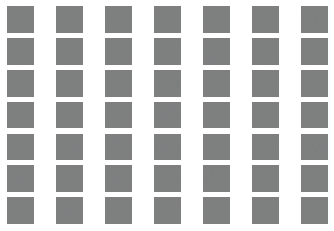

In [29]:
latent_dim=100
model=define_generator(latent_dim)
n_samples=49
X,_=generate_fake_samples(model,latent_dim,n_samples)
X=(X+1)/2.0
for i in range(n_samples):
    plt.subplot(7,7,1+i)
    plt.axis('off')
    plt.imshow(X[i])
    

In [30]:
def define_gan(g_model,d_model):
    d_model.trainable=False
    model=Sequential()
    
    model.add(g_model)
    model.add(d_model)
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model

    

In [31]:
latent_dim=100
d_model=define_discriminator()
g_model=define_generator(latent_dim)

gan_model=define_gan(g_model,d_model)
gan_model.summary()

C:\Users\mrhim\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_5 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


In [ ]:
def train(g_model,d_model,gan_model,latent_dim,n_epochs=200,n_batch=128):
    bat_per_epo= int(dataset.shape[0]/n_batch)
    half_batch=int(n_batch/2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real,y_real=generate_real_sample(dataset,half_batch)
            
            d_loss1,_=d_model.train_on_batch(X_real,y_real)
            
            X_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
            d_loss2,_=d_model.train_on_batch(X_fake,y_fake)
            
            X_gan=generate_latent_points(latent_dim,n_batch)
            y_gan=np.ones((n_batch,1))
            
            g_loss=gan_model.train_on_batch(X_gan,y_gan)
            print('>',i+1,' ',j+1,' ',bat_per_epo,' ',d_loss1,' ',d_loss2,' ',g_loss)
            
            if(i+1)%10==0:
                summarize_performance(i,g_model,d_model,dataset,latent_dim)
    
            